In [1]:
# # Install pandas, seaborn, scikit-learn if you dont already have it
# !pip install scikit-learn

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold

data_folder = os.getcwd().split("loan_approval_prediction")[0] + "loan_approval_prediction\\data\\"

In [3]:
credit_risk_df = pd.read_csv(data_folder + 'credit_risk_dataset.csv')  
credit_risk_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df = credit_risk_df.copy()

### Question: I need to do some data exploration in python. What are some things I need to check

To start data exploration in Python, there are a few essential steps that will give you a strong understanding of your dataset. Here's a general checklist:

1. Basic Information

- Shape of the Data: Use .shape to check the number of rows and columns.
- Data Types: Use .dtypes to inspect the types of each column.
- Initial View: Display the first few rows using .head() and last few rows with .tail() to get an overview.

2. Null and Missing Values
- Check for Nulls: Use .isnull().sum() to see the count of missing values in each column.
- Fill or Drop: Decide whether to fill or drop null values, depending on the analysis context.

3. Statistical Summaries
- Summary Statistics: Use .describe() for a quick look at mean, median, standard deviation, etc., for numerical columns.
- Categorical Summaries: Use .value_counts() on categorical columns to see distributions.

4. Data Distribution
- Numerical Distribution: Use histograms (sns.histplot() or .plot.hist()) to visualize the spread of numerical data.
- Box Plots: Use sns.boxplot() to identify outliers and the spread of numerical values.
- Categorical Distributions: Use bar charts for categorical variables to see distribution (sns.countplot()).

5. Correlation Analysis
- Correlation Matrix: Use .corr() to see correlation coefficients between numerical variables, and visualize with a heatmap (sns.heatmap()).
- Pair Plots: Use sns.pairplot() for visualizing pairwise relationships in the data.

6. Identifying Duplicates
- Duplicate Rows: Check for duplicate rows with .duplicated().sum().
- Drop Duplicates: Use .drop_duplicates() if necessary.

7. Data Types and Conversion
- Data Type Inspection: Ensure data types are correct for each column (e.g., datetime columns should be in datetime format).
- Convert Types: Use pd.to_datetime() for dates or .astype() for numerical or categorical conversions.

8. Outliers Detection
- Box Plots for Outliers: Revisit box plots to locate outliers in numerical data.
- Z-Scores or IQR: Use Z-scores or the Interquartile Range (IQR) method to identify outliers programmatically.

9. Feature Engineering Ideas
- Create New Features: Look for opportunities to engineer new features from existing data (e.g., creating age from a birth date).
- Label Encoding: Use LabelEncoder or pd.get_dummies() for categorical variables if planning for machine learning.

10. Visualizations
- Distribution Visualizations: For better understanding, use scatter plots, pair plots, or bar charts (sns.scatterplot(), sns.barplot()).
- Time Series Analysis: If you have time-series data, use line plots (sns.lineplot()) for trends over time.


These steps will give you a broad understanding of your data and reveal areas that may need cleaning, transforming, or further analysis. Let me know if you’d like specific code snippets for any of these steps.

In [5]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_data.csv")

# 1. Basic Information
print("Shape of the data:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape of the data: (32581, 12)

Data Types:
 person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [6]:
print("\nFirst few rows:\n")
df.head()


First few rows:



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
print("\nLast few rows:\n")
df.tail()


Last few rows:



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [8]:
# 2. Null and Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Optional: Fill or drop nulls
# df = df.dropna()  # Drop all rows with any null values
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # Fill nulls in a specific column with mean



Missing Values:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [9]:
df.isnull().sum().reset_index().rename(columns={0:'Total'}).merge(
    df[df['loan_status'] == 1].isnull().sum().reset_index().rename(columns={0:'Approved'})).merge(
    df[df['loan_status'] == 0].isnull().sum().reset_index().rename(columns={0:'Rejected'}))

,index,Total,Approved,Rejected
0,person_age,0,0,0
1,person_income,0,0,0
2,person_home_ownership,0,0,0
3,person_emp_length,895,282,613
4,loan_intent,0,0,0
5,loan_grade,0,0,0
6,loan_amnt,0,0,0
7,loan_int_rate,3116,644,2472
8,loan_status,0,0,0
9,loan_percent_income,0,0,0


In [10]:
# 3. Statistical Summaries
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
for col in df.select_dtypes(include='object').columns:
    total = df[col].value_counts().reset_index().rename(columns={'count':'total'})
    approved = df[df['loan_status'] == 1][col].value_counts().reset_index().rename(columns={'count':'approved'})
    rejected = df[df['loan_status'] == 0][col].value_counts().reset_index().rename(columns={'count':'rejected'})
    summary = total.merge(approved).merge(rejected)
    summary['approved_percentage'] = round(summary['approved'] / summary['total'], 2)
    print(f"\nValue Counts for {col}:\n", summary)



Value Counts for person_home_ownership:
   person_home_ownership  total  approved  rejected  approved_percentage
0                  RENT  16446      5192     11254                 0.32
1              MORTGAGE  13444      1690     11754                 0.13
2                   OWN   2584       193      2391                 0.07
3                 OTHER    107        33        74                 0.31

Value Counts for loan_intent:
          loan_intent  total  approved  rejected  approved_percentage
0          EDUCATION   6453      1111      5342                 0.17
1            MEDICAL   6071      1621      4450                 0.27
2            VENTURE   5719       847      4872                 0.15
3           PERSONAL   5521      1098      4423                 0.20
4  DEBTCONSOLIDATION   5212      1490      3722                 0.29
5    HOMEIMPROVEMENT   3605       941      2664                 0.26

Value Counts for loan_grade:
   loan_grade  total  approved  rejected  approved_pe

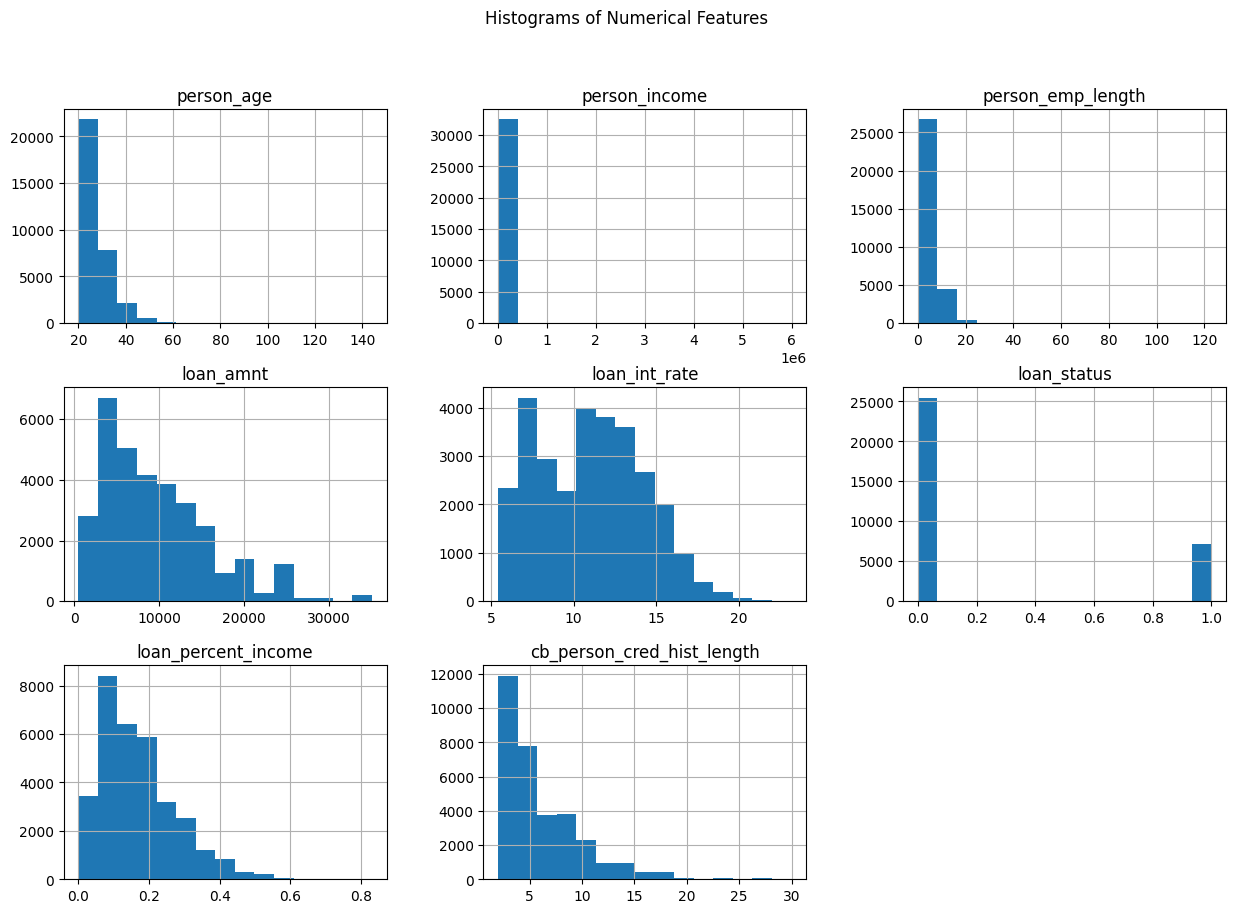

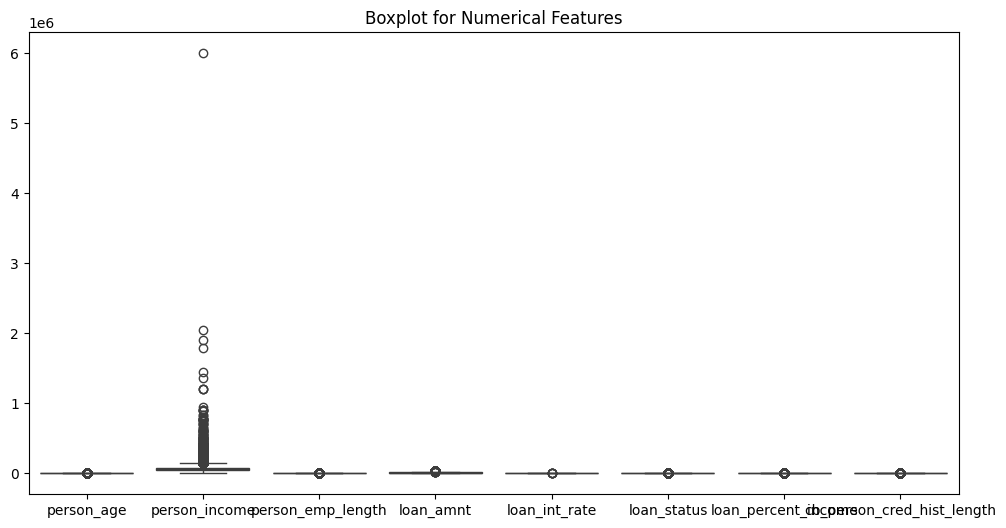

In [12]:
# 4. Data Distribution
# Plot histograms for numerical columns
df.select_dtypes(include=['float64', 'int64']).hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box Plot for each numerical feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot for Numerical Features")
plt.show()

# # Categorical Distribution
# for col in df.select_dtypes(include='object').columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=col, data=df, order=df[col].value_counts().index)
#     plt.title(f"Count plot for {col}")
#     plt.show()

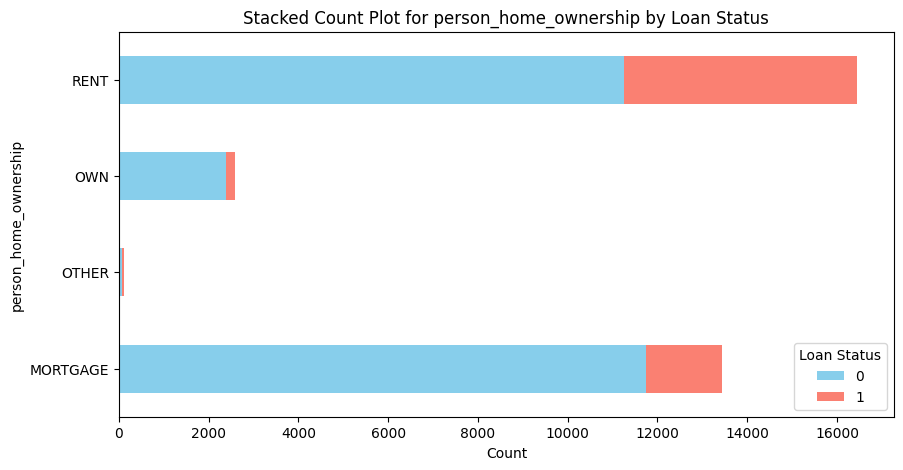

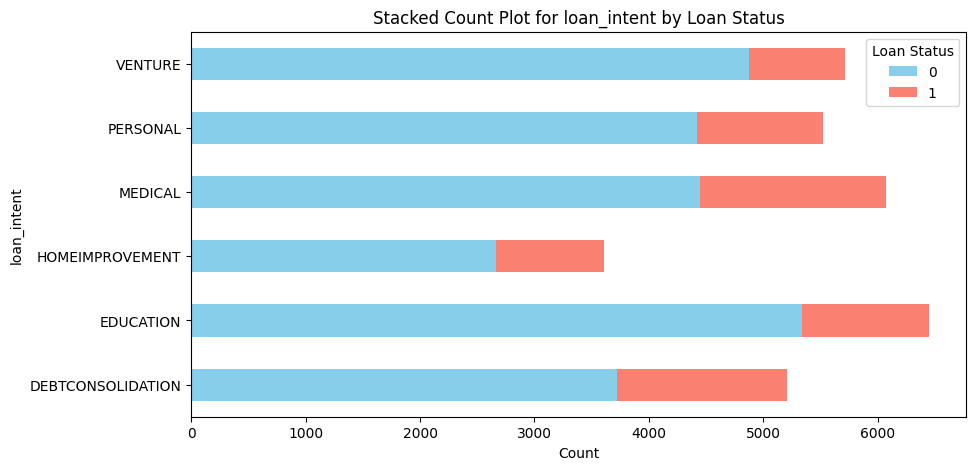

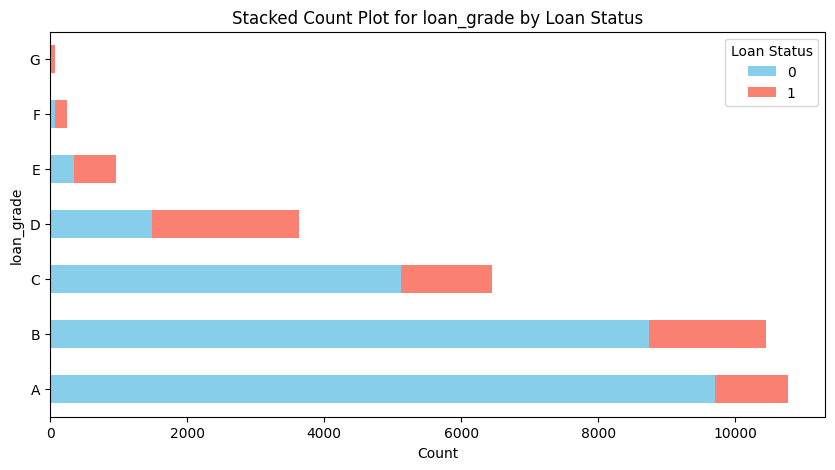

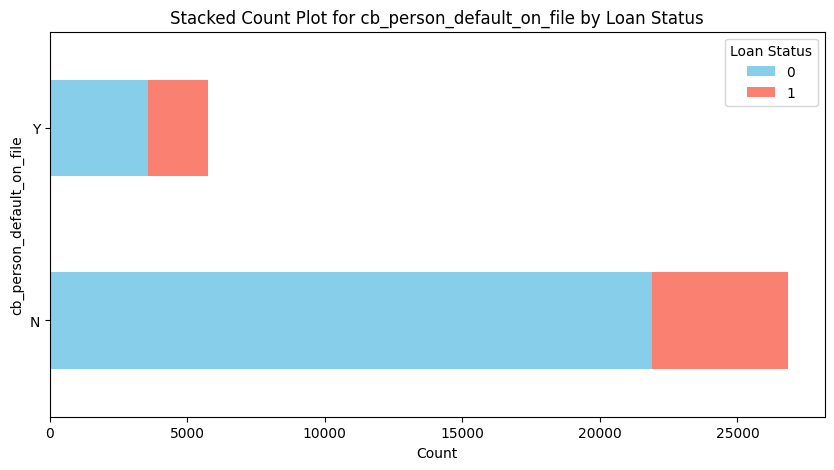

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through each categorical column and create a stacked bar plot
for col in df.select_dtypes(include='object').columns:
    # Create a cross-tabulation of counts for each value in the column by loan_status
    count_data = pd.crosstab(df[col], df['loan_status'])
    
    # Plotting a stacked horizontal bar chart
    count_data.plot(kind='barh', stacked=True, figsize=(10, 5), color=['skyblue', 'salmon'])
    
    plt.title(f"Stacked Count Plot for {col} by Loan Status")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.legend(title="Loan Status", labels=["0", "1"])
    plt.show()

In [14]:
# 6. Identifying Duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Optional: Drop duplicates
# df = df.drop_duplicates()


Number of duplicate rows: 165


In [15]:
# Show all instances of duplicated rows
all_duplicated_rows = df[df.duplicated(keep=False)]
all_duplicated_rows.sort_values(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [16]:
df["duplicated"] = df.duplicated(keep=False)

# pd.set_option('display.max_rows', None)
# df.sort_values(['person_age', 'person_income', 'person_home_ownership',
#        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
#        'loan_int_rate', 'loan_status', 'loan_percent_income',
#        'cb_person_default_on_file', 'cb_person_cred_hist_length'])

In [17]:
# # 8. Outliers Detection
# # Boxplot by feature to detect outliers
# for col in df.select_dtypes(include=['float64', 'int64']).columns:
#     plt.figure(figsize=(10, 5))
#     sns.boxplot(x=col, data=df)
#     plt.title(f"Boxplot of {col}")
#     plt.show()


### Question: This data will be used to model classification. Knowing this, is there anything additional that should be looked at during data exploration?

Since you’ll be using the data for classification, there are a few additional steps to improve your data exploration and ensure your dataset is optimized for building a robust model. Here’s what you should check:

1. Class Balance
- Check the balance of the target class to identify any class imbalance, as it can affect model performance.
- Use value_counts() on your target column or plot it with a bar chart to visualize the class distribution.

2. Feature Scaling
- For algorithms sensitive to feature scaling (e.g., logistic regression, SVM, KNN), check the range of numerical features to ensure consistent scaling.
- You can use .describe() to check the range and consider scaling (e.g., MinMaxScaler or StandardScaler) if ranges vary widely.

3. Feature Correlation with Target
- Measure the correlation of each feature with the target label to understand the potential predictive power of each feature.
- For numerical features, you can use .corrwith(target_column), and for categorical, evaluate distributions within each class.

4. Redundant and Low-Variance Features
- Identify highly correlated features and consider dropping one to avoid multicollinearity, which can hinder some models.
- Check for low-variance features, as they may not contribute to classification (use .var() or VarianceThreshold).

5. Categorical Feature Encoding
- Ensure all categorical variables are properly encoded for model training. Use pd.get_dummies() for one-hot encoding or LabelEncoder for ordinal data.
- Avoid high cardinality categorical features, as they can introduce sparsity in the dataset.

6. Handling Outliers Carefully
- Outliers may affect models differently. For tree-based models, they may not be an issue, but for linear models, they can skew results.
- Carefully decide on either treating or retaining outliers based on their impact on the model.

7. Dimensionality Reduction (Optional)
- Consider performing PCA or another dimensionality reduction method if you have many features, especially after one-hot encoding.



Class Distribution for 'loan_status':
 loan_status
0    25473
1     7108
Name: count, dtype: int64


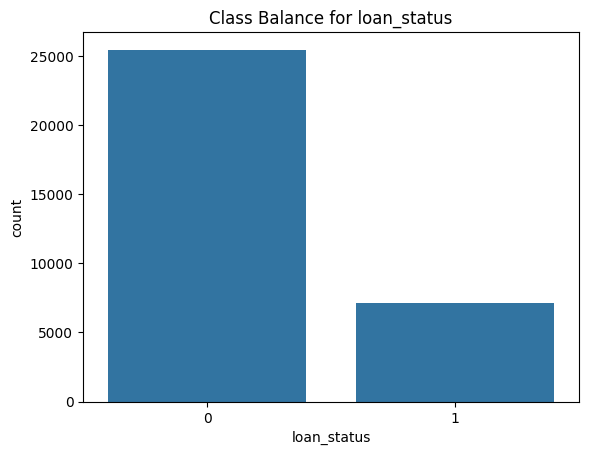

In [18]:
# 3. Class Balance for 'loan_status'
print("\nClass Distribution for 'loan_status':\n", df['loan_status'].value_counts())
sns.countplot(x='loan_status', data=df)
plt.title("Class Balance for loan_status")
plt.show()


Correlation with loan_status:
 person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64


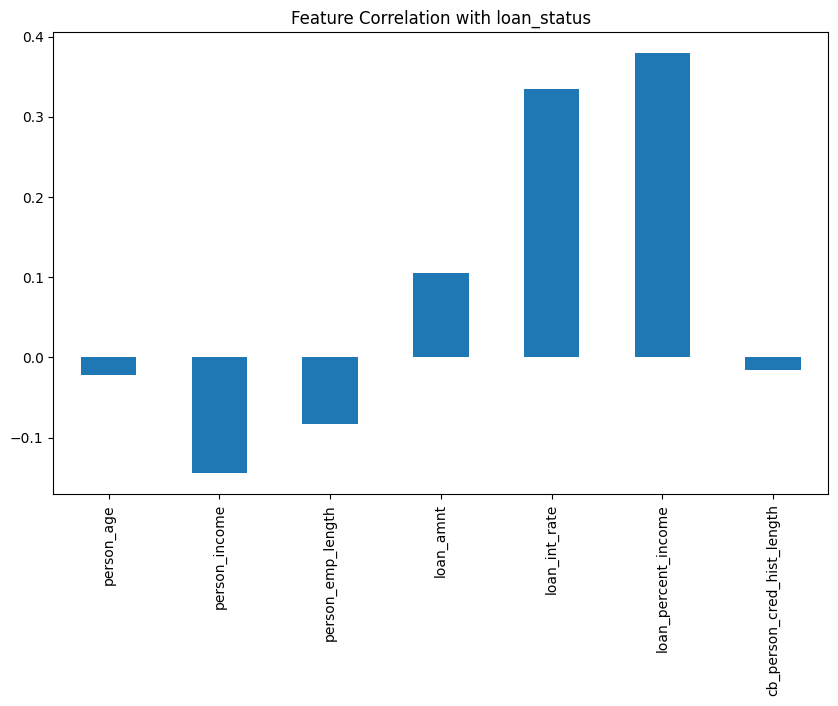

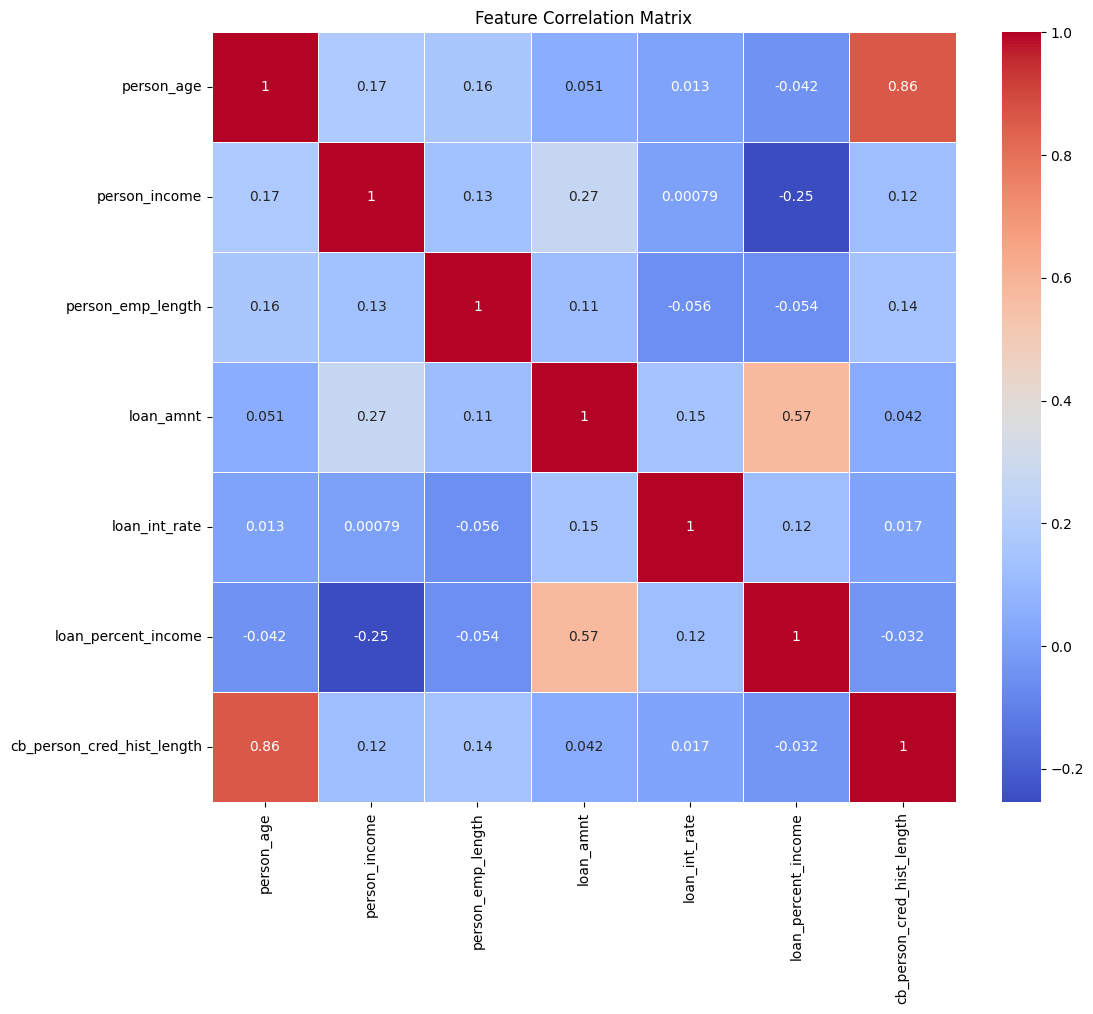

In [19]:
# 6. Correlation Analysis
# Correlation with 'loan_status'
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['loan_status'], errors='ignore')
correlations = numerical_features.corrwith(df['loan_status'])
print("\nCorrelation with loan_status:\n", correlations)

# Visualizing Correlation with Target
correlations.plot(kind='bar', figsize=(10, 6), title="Feature Correlation with loan_status")
plt.show()

# Redundant Features Check - Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [20]:
# 7. Low Variance Feature Detection
# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selector.fit(df.select_dtypes(include=['float64', 'int64']))

# Get the list of retained columns
retained_columns = df.select_dtypes(include=['float64', 'int64']).columns[selector.get_support()]

print("Retained Columns after Low Variance Filtering:\n", retained_columns)


Retained Columns after Low Variance Filtering:
 Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'cb_person_cred_hist_length'],
      dtype='object')


In [21]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [22]:
# 8. Encoding Categorical Features
# Encode categorical features with LabelEncoder for simplicity
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,duplicated
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3,False
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,False
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,False
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,False
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,False


In [23]:
# 9. Feature Scaling
# Scaling numerical features for distance-based models
# Select numerical columns excluding 'loan_status'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('loan_status')

# Scale only the selected numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])

# Assign the scaled features back to the original dataframe
df[numerical_cols] = scaled_features

In [24]:
# # Optional: Dimensionality Reduction with PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)  # Retain 95% variance
# df_pca = pca.fit_transform(df.drop(columns=['loan_status']))
# print(f"PCA reduced data shape: {df_pca.shape}")
